In [14]:
import os
from dotenv import load_dotenv
load_dotenv()

ML_Summer_School_ID = str(os.getenv('ML_Summer_School_ID'))
print("Your Sudent ID is: " + ML_Summer_School_ID)

Your Sudent ID is: None


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
image_size = (150, 200)
print(type(image_size))

w,h= image_size
print(w,h)

<class 'tuple'>
150 200


In [6]:
image_size = (150, 200)


img = np.zeros((image_size[0], image_size[1], 3), dtype=np.uint8)


img[20:100, 30:120] = [255, 100, 50] # Blue-ish rectangle
img[50:130, 80:180] = [50, 200, 255] # Yellow-ish rectangle


cv2.circle(img, (100, 75), 30, (0, 255, 0), -1) # Green circle


cv2.imwrite('filter_sample.jpg', img)

True

### Apply Gaussian Blur

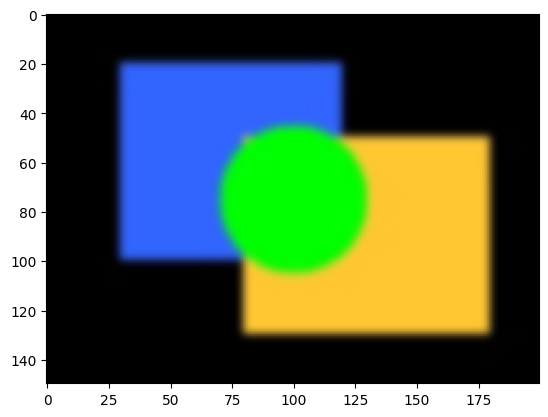

In [7]:
img_bgr = cv2.imread('filter_sample.jpg')


img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)


gaussian_blurred = cv2.GaussianBlur(img_rgb, (9, 9), 0)

plt.imshow(gaussian_blurred)




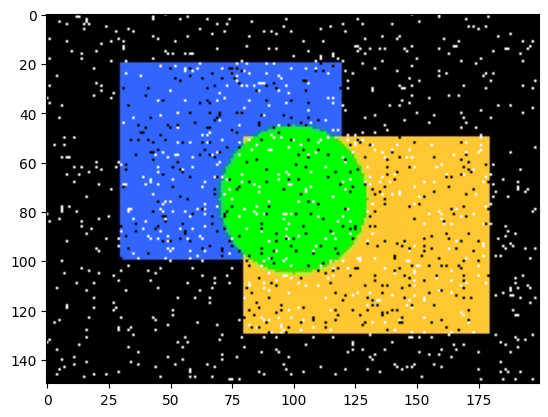

In [8]:
img_noisy = np.copy(img_rgb)
num_salt = int(0.01 * img_noisy.size)


coords = [np.random.randint(0, i - 1, num_salt) for i in img_noisy.shape]
img_noisy[coords[0], coords[1], :] = 255 # Salt


num_pepper = int(0.01 * img_noisy.size)
coords = [np.random.randint(0, i - 1, num_pepper) for i in img_noisy.shape]
img_noisy[coords[0], coords[1], :] = 0 # Pepper

plt.imshow(img_noisy)

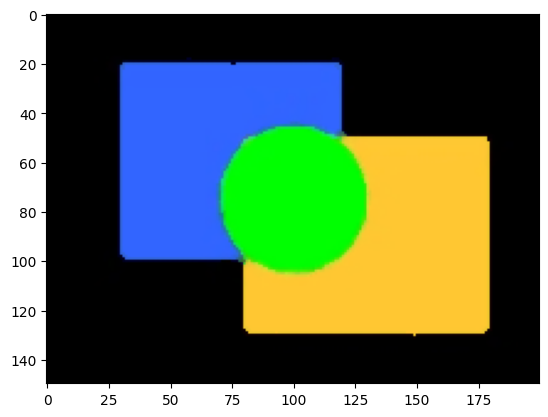

In [9]:
median_blurred = cv2.medianBlur(img_noisy, 5)
plt.imshow(median_blurred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


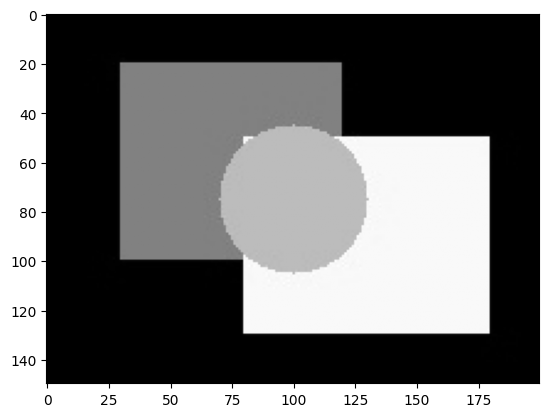

In [10]:
plt.imshow(img_gray, cmap='gray')
print(img_gray)

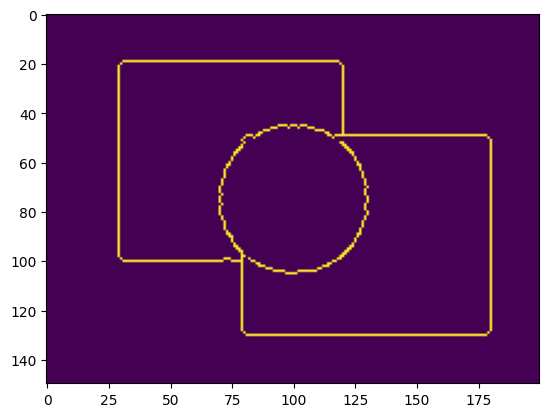

In [16]:

threshold1  = 100
threshold2 = 200

canny_edges = cv2.Canny(img_gray, threshold1, threshold2)
plt.imshow(canny_edges)

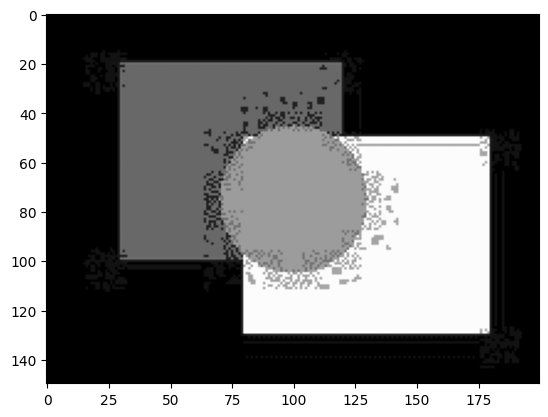

In [13]:
equalized_gray = cv2.equalizeHist(img_gray)
plt.imshow(equalized_gray, cmap='gray')

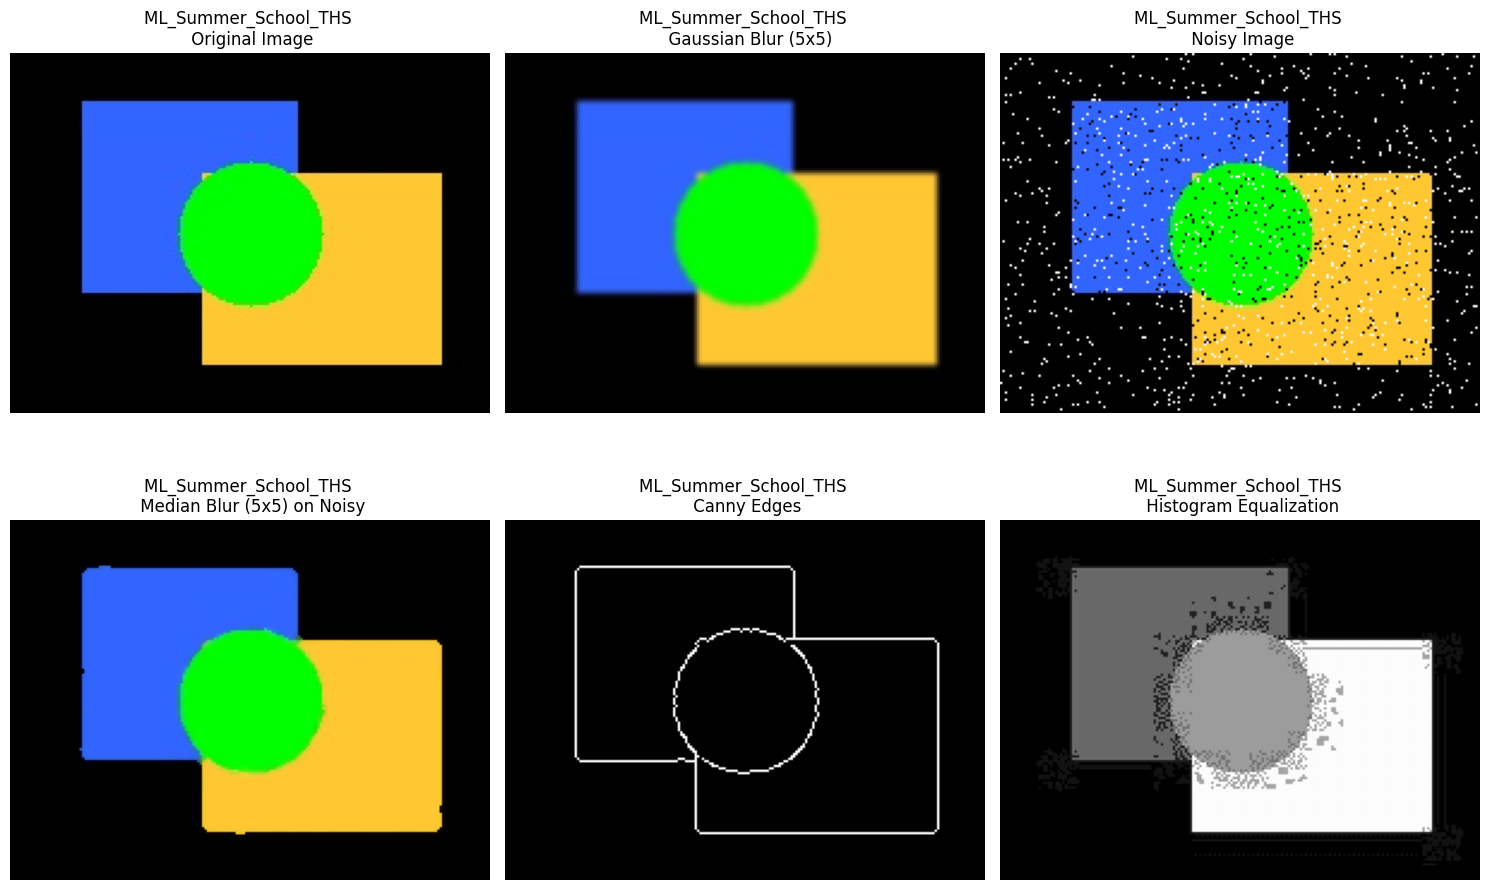

In [15]:
# Display results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title(f'{ML_Summer_School_ID} \n Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(gaussian_blurred)
axes[0, 1].set_title(f'{ML_Summer_School_ID} \n  Gaussian Blur (5x5)')
axes[0, 1].axis('off')

axes[0, 2].imshow(img_noisy)
axes[0, 2].set_title(f'{ML_Summer_School_ID} \n Noisy Image')
axes[0, 2].axis('off')

axes[1, 0].imshow(median_blurred)
axes[1, 0].set_title(f'{ML_Summer_School_ID} \n Median Blur (5x5) on Noisy')
axes[1, 0].axis('off')

axes[1, 1].imshow(canny_edges, cmap='gray')
axes[1, 1].set_title(f'{ML_Summer_School_ID} \n Canny Edges')
axes[1, 1].axis('off')

axes[1, 2].imshow(equalized_gray, cmap='gray')
axes[1, 2].set_title(f'{ML_Summer_School_ID} \n Histogram Equalization')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()